In [100]:
datadir='../Datasets/'

In [101]:
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from collections import Counter
from scipy.stats import poisson
#import plfit

## Question 4
(P) Compare the above theoretical prediction for the expected num-
ber of isolated edges with empirical results based on 1,000 indepen-
dent runs for small graphs on n = 100 nodes and larger graphs on
n = 10;000 nodes.

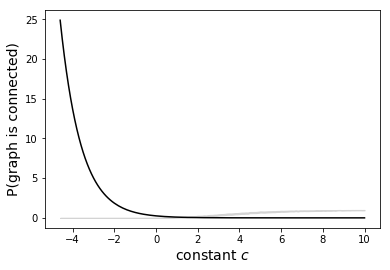

In [102]:
n = 100
#number of repeats
REP = 1000
lo = -int(np.floor(np.log(n)*10))/10
if lo<-10:
    lo = -10
C = np.arange(lo,10.1,.1)
ic_avg=[]
for c in C:
    x = []
    for rep in range(REP):
        p = ((np.log(n)+np.log(np.log(n))+c)/(2*n))
        g = ig.Graph.Erdos_Renyi(n=n, p=p)
        x.append(int(g.is_connected()))
    ic_avg.append(np.mean(x))

## theoretical
th = [(0.25*np.exp(-c)) for c in C]

## plot
plt.fill_between(C,[x-1.654*np.sqrt(x*(1-x)/n) for x in ic_avg],
                 [x+1.645*np.sqrt(x*(1-x)/n) for x in ic_avg],color='lightgray')
plt.plot(C,th,color='black')
plt.xlabel(r'constant $c$',fontsize=14)
plt.ylabel('P(graph is connected)',fontsize=14);

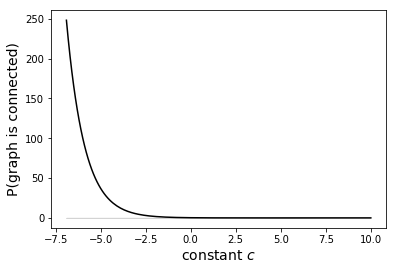

In [430]:
n = 1000
#number of repeats
REP = 1000 
lo = -int(np.floor(np.log(n)*10))/10
if lo<-10:
    lo = -10
C = np.arange(lo,10.1,.1)
ic_avg=[]
for c in C:
    x = []
    for rep in range(REP):
        p = (np.log(n)+np.log(np.log(n))+c)/(2*n)
        g = ig.Graph.Erdos_Renyi(n=n, p=p)
        x.append(int(g.is_connected()))
    ic_avg.append(np.mean(x))

## theoretical
th = [((np.exp(-c))/4) for c in C]

## plot
plt.fill_between(C,[x-1.654*np.sqrt(x*(1-x)/n) for x in ic_avg],
                 [x+1.645*np.sqrt(x*(1-x)/n) for x in ic_avg],color='lightgray')
plt.plot(C,th,color='black')
plt.xlabel(r'constant $c$',fontsize=14)
plt.ylabel('P(graph is connected)',fontsize=14);

## Question 5. 
(P)We showed that the expected number of cycles in Pn;2 is asymptotic to (1=2) ln n. Compare this theoretical prediction with empir-ical results based on 1,000 independent runs for small graphs on n = 100 nodes and larger graphs on n = 10;000 nodes.

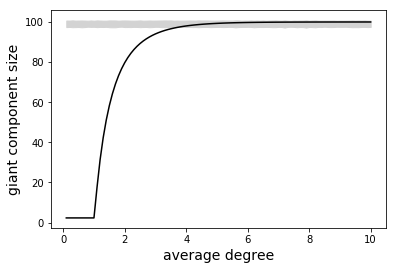

In [425]:
n = 100
# n=10000
gc_avg = []
gc_std = []
#number of repeats
REP = 1000 
ad = np.arange(.1,10.1,.1)
for d in ad:
    x = []
    for rep in range(REP):
        p = (c+np.log(n))/n
        g = ig.Graph.Erdos_Renyi(n=n, p=p)
        x.append(g.clusters().giant().vcount())
    gc_avg.append(np.mean(x))
    gc_std.append(np.std(x))

## theoretical
th = [(0.5*np.log(n)) for i in np.arange(.1,1.1,.1)]
from scipy.optimize import fsolve
def fn(x,d):
    return x+np.exp(-x*d)-1
for i in np.arange(1.1,10.1,.1):
    th.append(n*fsolve(fn,1,args=(i))[0])

plt.fill_between(ad,[x[0]-1.654*x[1] for x in zip(gc_avg,gc_std)],
                 [x[0]+1.645*x[1] for x in zip(gc_avg,gc_std)],color='lightgray')
plt.plot(ad,th,color='black')
plt.xlabel('average degree',fontsize=14)
plt.ylabel('giant component size',fontsize=14);

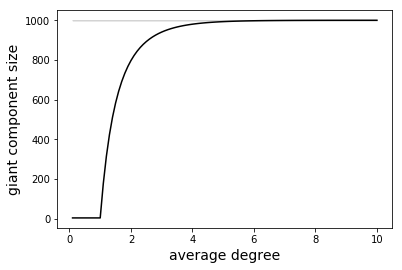

In [431]:
n = 1000
# n=10000
gc_avg = []
gc_std = []
#number of repeats
REP = 1000
ad = np.arange(.1,10.1,.1)
for d in ad:
    x = []
    for rep in range(REP):
        p = (c+np.log(n))/n
        g = ig.Graph.Erdos_Renyi(n=n, p=p)
        x.append(g.clusters().giant().vcount())
    gc_avg.append(np.mean(x))
    gc_std.append(np.std(x))

## theoretical
th = [(0.5*np.log(n)) for i in np.arange(.1,1.1,.1)]
from scipy.optimize import fsolve
def fn(x,d):
    return x+np.exp(-x*d)-1
for i in np.arange(1.1,10.1,.1):
    th.append(n*fsolve(fn,1,args=(i))[0])

plt.fill_between(ad,[x[0]-1.654*x[1] for x in zip(gc_avg,gc_std)],
                 [x[0]+1.645*x[1] for x in zip(gc_avg,gc_std)],color='lightgray')
plt.plot(ad,th,color='black')
plt.xlabel('average degree',fontsize=14)
plt.ylabel('giant component size',fontsize=14);

## Question 7.
(P+T) Generate two independent copies of G(n; p) model with n = 10;000 and p = 1=4, graphs G1 and G2. Then take a union of these two graphs, G1 [ G2 (edge uv is present in G1 [ G2 if it is present in at least one of the two involved graphs). Check the density of G1 [G2, that is, the ratio between the number of edges in G1 [G2 and 􀀀n 2 Is it close to p + p = 1/2? If not, can you explain it?

In [519]:
#generate 1st graph G1 using erdos renyi 
n = 100
p = 1/4
G1 = ig.Graph.Erdos_Renyi(n=n, p=p)

In [520]:
#generate 2nd graph G1 using erdos renyi 
n = 100
p = 1/4
G2 = ig.Graph.Erdos_Renyi(n=n, p=p)

In [521]:
#take union of G1 and G2
G = ig.Graph.union(G1,G2)
#find density of the union of the graph
G_density = ig.Graph.density(G)
G_density

0.4347474747474747

#### Answer 7 : The density is almost close to 0.5.

## Question 8
(P) Watts{Strogatz model generates networks with small diam-
eter and large clustering coecient. It starts from a grid network
where all nodes have the same number of \close" neighbours. Each
node is then independently \rewired" with probability p 2 [0; 1]. If
an edge is rewired, one of its endpoints is preserved and the other one is replaced by a node selected uniformly at random from the set of all nodes. This typically create a \long" edge.
This model is implemented in igraph (sample smallworld). Per-
form experiment with dim = 2 (dimension of the lattice), size =
100 (the size of the lattice along each dimension), nei = 8 (the av-
erage degree). Plot the global clustering coecient and the average
local clustering coecient as a function of p 2 (0; 1). You may want
to do a few repetitions for each value of p to smooth the graph.

In [439]:
#Used ig graph function for Watts_Strogatz model
G_watts = ig.Graph.Watts_Strogatz(2,100,8,p=0.0001)

In [440]:
#find the global clustering coef and average clustering coef
Global_clustering_coef = ig.Graph.transitivity_undirected(G_watts)
average_clustering_coef = G_watts.transitivity_local_undirected()

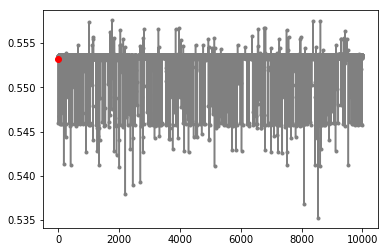

In [441]:
plt.plot(average_clustering_coef,'.-', color = 'grey')
plt.plot(Global_clustering_coef, color = 'red', marker = "o")

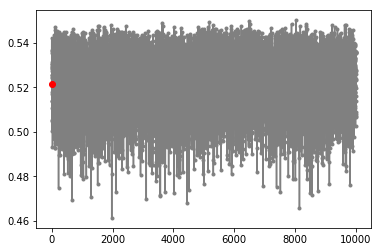

In [442]:
#plot the graph with different porbaility, p =0.01
G_watts = ig.Graph.Watts_Strogatz(2,100,8,p=0.01)
Global_clustering_coef = ig.Graph.transitivity_undirected(G_watts)
average_clustering_coef = G_watts.transitivity_local_undirected()
plt.plot(average_clustering_coef,'.-', color = 'grey')
plt.plot(Global_clustering_coef, color = 'red', marker = "o")

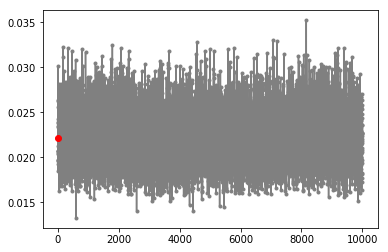

In [443]:
#plot the graph with different porbaility, p =0.5
G_watts = ig.Graph.Watts_Strogatz(2,100,8,p=0.5)
Global_clustering_coef = ig.Graph.transitivity_undirected(G_watts)
average_clustering_coef = G_watts.transitivity_local_undirected()
plt.plot(average_clustering_coef,'.-', color = 'grey')
plt.plot(Global_clustering_coef, color = 'red', marker = "o")

#### If the value of p is lower the graph is more smooth.

## Question 9
    (P) Preferential Attachment model uses \rich get richer" prin-
ciple to generate graphs with power-law degree distribution. This
model is implemented in igraph (sample pa). Perform experiment
with n = 10; 000 (the number of nodes) and m = 5 (the number of
directed edges created in each step). Plot the inverse cumulative in-
degree distribution. Use the Kolmogorov{Smirnov test to estimate
the degree exponent.

In [ ]:
#use ig graph function of Barabasi model to generate the graph
G = ig.Graph.Barabasi(10000,5)
#find the degree of the graph
d = G.degree()
X = plfit.plfit(d)
print(X.plfit())
ax = plt.figure(1)
ax = X.xminvsks()
ax.set_xlabel(r'$\ell$',fontsize=14)
ax.set_ylabel('Kolmogorov-Smirnov statistic',fontsize=12);

In [ ]:
# Kolmogorov Smirnov test
X.test_pl(niter=100)

In [ ]:
#plot the inverse cdf
X.plotcdf(pointcolor='grey', pointmarker='.',zoom=False)